In [8]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import h5py
import matplotlib.pyplot as plt
from numpy.random import RandomState
from numpy import unravel_index


import time


## preprocess ##

In [ ]:
# ori_train = pd.read_csv('train.csv')
# ori_test = pd.read_csv('test.csv')
# ori_val = pd.read_csv('validation.csv')
# def split_useragent_os(data):
#     return data.split('_')[0]
# def split_useragent_b(data):
#     return data.split('_')[1]
# def split_useragent(dataframe):
#     dataframe['os'] = dataframe['useragent'].apply(split_useragent_os)
#     dataframe['browser'] = dataframe['useragent'].apply(split_useragent_b)
#     dataframe.drop(['useragent'], axis=1, inplace=True)

# split_useragent(ori_train)
# split_useragent(ori_test)
# split_useragent(ori_val)

# ori_train['logtype']='2'
# ori_test['logtype']='2'
# ori_val['logtype']='2'

# ori_train.to_csv('train1.csv')
# ori_test.to_csv('test1.csv')
# ori_val.to_csv('val1.csv')
# df_train_original = pd.read_csv('train.csv')
# df_validation_original = pd.read_csv('validation.csv')
# df_test_original = pd.read_csv('test.csv')

# # split os and browser
# def split_useragent_os(data):
#     return data.split('_')[0]
# def split_useragent_b(data):
#     return data.split('_')[1]
# def split_useragent(dataframe):
#     dataframe['os'] = dataframe['useragent'].apply(split_useragent_os)
#     dataframe['browser'] = dataframe['useragent'].apply(split_useragent_b)
#     dataframe.drop(['useragent'], axis=1, inplace=True)

# split_useragent(df_train_original)
# split_useragent(df_validation_original)
# split_useragent(df_test_original)

# #drop meaningless columns and the columns not in testdata
# col_to_drop1 = ['city','slotid','slotprice','IP','domain','usertag','creative','bidid','userid','url','urlid','bidprice','payprice','keypage']
# test_to_drop = ['city','slotid','slotprice','IP','domain','usertag','creative','bidid','userid','url','urlid','keypage']
# df_train = df_train_original.drop(col_to_drop1, axis=1)
# df_validation = df_validation_original.drop(col_to_drop1, axis=1)
# df_test = df_test_original.drop(test_to_drop, axis=1)

# #make the catagorical data into one hot format : eg monday ->[ 1, 0, 0 ,0 ,0 ,0 ,0 ]
# def onehot(onehot_df, column_name):
#     dummies = pd.get_dummies(onehot_df[column_name],prefix=column_name)
#     onehot_df = onehot_df.join(dummies)
#     onehot_df = onehot_df.drop([column_name], axis=1)
#     return onehot_df
# column_to_onehot = ['weekday','hour','region','adexchange','slotformat','os','browser','slotwidth','slotheight','slotvisibility']
# for col_name in column_to_onehot:
#     df_train = onehot(df_train, col_name)
#     df_validation = onehot(df_validation, col_name)
#     x_test = onehot(df_test, col_name)

# x_train = df_train.drop('click',axis =1 )
# x_val   = df_validation.drop('click',axis =1 )

# print(x_train.shape)
# print(x_val.shape)
# print(x_test.shape)

# x_train.to_csv('train_notag.csv')
# x_val.to_csv('val_notag.csv')
# x_test.to_csv('test_notag.csv')
# print('save data_notag train val test end')
    
# usertag_train = pd.read_csv('tag_train.csv')
# usertag_test = pd.read_csv('tag_test.csv')
# usertag_val = pd.read_csv('tag_val.csv')

# drop_train = pd.concat([df_train, usertag_train], axis=1, join_axes=[df_train.index])
# drop_val = pd.concat([df_validation, usertag_val], axis=1, join_axes=[df_validation.index])
# x_test = pd.concat([df_test, usertag_test], axis=1, join_axes=[df_test.index])
# print('join usertag end')

# x_train = drop_train.drop('click',axis =1 )
# x_val   = drop_val.drop('click',axis =1 )

# print(x_train.shape)
# print(x_val.shape)
# print(x_test.shape)

# x_train.to_csv('train5.csv')
# x_val.to_csv('val5.csv')
# x_test.to_csv('test5.csv')
# print('save model_used train val test end')

In [10]:
# ori_train = pd.read_csv('train.csv')
# ori_test = pd.read_csv('test.csv')
# ori_val = pd.read_csv('validation.csv')

# x_train = pd.read_csv('train4.csv')
# x_test = pd.read_csv('test4.csv')
# x_val = pd.read_csv('val4.csv')

x_train = pd.read_csv('train5.csv')
x_test = pd.read_csv('test5.csv')
x_val = pd.read_csv('val5.csv')

ori_train = pd.read_csv('train1.csv')
ori_test = pd.read_csv('test1.csv')
ori_val = pd.read_csv('val1.csv')

In [5]:
print(ori_train.shape)
print(ori_val.shape)
print(ori_test.shape)

(2430981, 29)
(303925, 29)
(303375, 26)


In [6]:
ori_train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'click', 'weekday', 'hour', 'bidid',
       'userid', 'IP', 'region', 'city', 'adexchange', 'domain', 'url',
       'urlid', 'slotid', 'slotwidth', 'slotheight', 'slotvisibility',
       'slotformat', 'slotprice', 'creative', 'bidprice', 'payprice',
       'keypage', 'advertiser', 'usertag', 'os', 'browser', 'logtype'],
      dtype='object')

## basic statistic ##

In [7]:
def sta_eva(train):
    dataset_stats = pd.DataFrame()
    dataset_stats['advertiser'] = np.sort(train.advertiser.unique())
    dataset_stats['impressions'] = train.groupby('advertiser').size().values
    click = train.groupby('advertiser').click.value_counts()
    dataset_stats['clicks'] = click.iloc[click.index.get_level_values('click') == 1].values  
    temp = train.groupby('advertiser').payprice.sum().values
    dataset_stats['cost'] = (temp/1000).round()
    dataset_stats['CTR'] = (((dataset_stats.clicks / dataset_stats.impressions) * 100).round(3)).astype(str) + '%'
    dataset_stats['CPM'] = (((dataset_stats.cost / dataset_stats.impressions)*1000).round(2)).astype(str)
    dataset_stats['eCPC'] = ((dataset_stats.cost / dataset_stats.clicks).round(2)).astype(str)

    dataset_stats = dataset_stats.set_index('advertiser', inplace=False, drop=True)
    return dataset_stats

In [8]:
sta_eva(ori_train)

,impressions,clicks,cost,CTR,CPM,eCPC
advertiser,,,,,,
1458,492353,385,33969.0,0.078%,68.99,88.23
2259,133673,43,12428.0,0.032%,92.97,289.02
2261,110122,36,9874.0,0.033%,89.66,274.28
2821,211366,131,18828.0,0.062%,89.08,143.73
2997,49829,217,3129.0,0.435%,62.79,14.42
3358,264956,202,22447.0,0.076%,84.72,111.12
3386,455041,320,34932.0,0.07%,76.77,109.16
3427,402806,272,30459.0,0.068%,75.62,111.98
3476,310835,187,23919.0,0.06%,76.95,127.91


In [9]:
sta_eva(ori_val)

,impressions,clicks,cost,CTR,CPM,eCPC
advertiser,,,,,,
1458,62353,49,4295.0,0.079%,68.88,87.65
2259,16715,2,1569.0,0.012%,93.87,784.5
2261,13550,3,1215.0,0.022%,89.67,405.0
2821,26503,23,2395.0,0.087%,90.37,104.13
2997,6176,26,389.0,0.421%,62.99,14.96
3358,32939,23,2794.0,0.07%,84.82,121.48
3386,56665,28,4351.0,0.049%,76.78,155.39
3427,50183,37,3777.0,0.074%,75.26,102.08
3476,38841,11,2994.0,0.028%,77.08,272.18


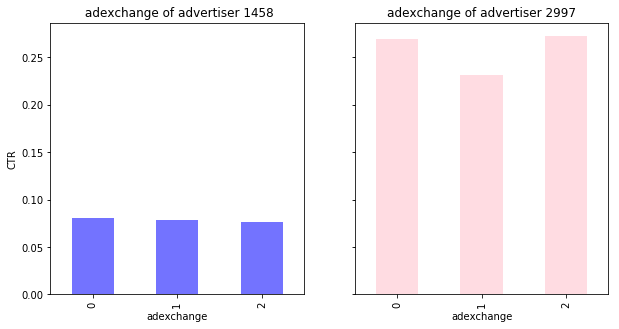

In [10]:
adexchange_CTR =pd.DataFrame()
adexchange_CTR['adexchange'] = np.sort(ori_train.adexchange.unique())

adexchange_click = ori_train.groupby(['advertiser','adexchange']).click.value_counts()

adexchange_imp_ad1 = ori_train.groupby('adexchange').advertiser.value_counts()
adexchange_imp_ad2 = ori_train.groupby('adexchange').advertiser.value_counts()

adexchange_imp_ad1_cal = adexchange_imp_ad1.iloc[adexchange_imp_ad1.index.get_level_values('advertiser') == 1458].values 
adexchange_imp_ad2_cal = adexchange_imp_ad2.iloc[adexchange_imp_ad2.index.get_level_values('advertiser') == 2997].values


ad_click_ad1 = adexchange_click.iloc[adexchange_click.index.get_level_values('advertiser') == 1458]
ad_click_ad2 = adexchange_click.iloc[adexchange_click.index.get_level_values('advertiser') == 2997]

ad_click_ad1_cal = ad_click_ad1.iloc[ad_click_ad1.index.get_level_values('click') == 1].values
ad_click_ad2_cal = ad_click_ad2.iloc[ad_click_ad2.index.get_level_values('click') == 1].values
adexchange_CTR = adexchange_CTR.drop([3,4])
adexchange_CTR['CTR_ad1'] = ((ad_click_ad1_cal/ adexchange_imp_ad1_cal) * 100).round(3)
adexchange_CTR['CTR_ad2'] = ((ad_click_ad1_cal / adexchange_imp_ad2_cal) * 100).round(3)

pic=plt.figure(figsize=(10,5))
alpha_level = 0.55

pic1 = pic.add_subplot(1,2,1)

adexchange_CTR['CTR_ad1'].plot(kind='bar',color='blue', 
                  alpha=alpha_level)
#pic1.set_xticklabels(["1", "2", "3"], rotation=0)
plt.title(" adexchange of advertiser 1458")
plt.ylabel('CTR')
plt.xlabel('adexchange')


pic2 = pic.add_subplot(1,2,2,sharey=pic1)   #share the same y axis with `pic1`

adexchange_CTR['CTR_ad2'].plot(kind='bar',color='pink', alpha=alpha_level)
plt.title("adexchange of advertiser 2997")
plt.xlabel('adexchange')

In [11]:
adexchange_CTR

,adexchange,CTR_ad1,CTR_ad2
0,1,0.081,0.269
1,2,0.078,0.231
2,3,0.076,0.273


In [12]:
def plot_ctr(advertiser1,advertiser2,category):
 
    df_clicked1 = ori_train.loc[(ori_train['advertiser']==advertiser1)]

    cost_weekday1 = df_clicked1.groupby(ori_train[category])

    dfeCPC1 = pd.DataFrame(cost_weekday1.sum().click/cost_weekday1.sum().logtype).rename(columns={0:advertiser1})
    
    df_clicked2 = ori_train.loc[(ori_train['advertiser']==advertiser2)]

    cost_weekday2 = df_clicked2.groupby(ori_train[category])

    dfeCPC2 = pd.DataFrame(cost_weekday2.sum().click/cost_weekday2.sum().logtype).rename(columns={0:advertiser2})
    plt.figure
    pd.concat([dfeCPC1,dfeCPC2],axis=1).plot()
    plt.ylabel('CTR')

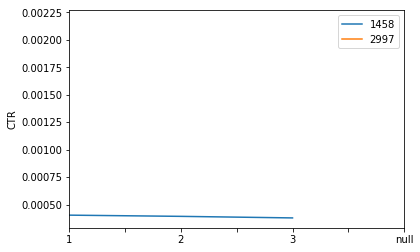

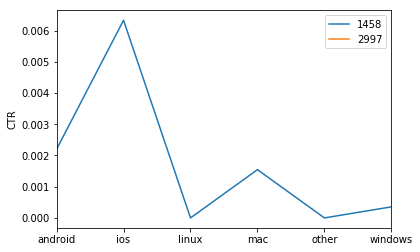

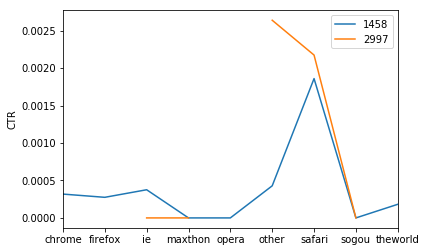

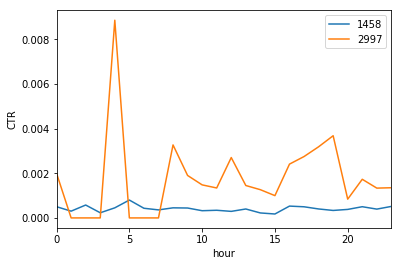

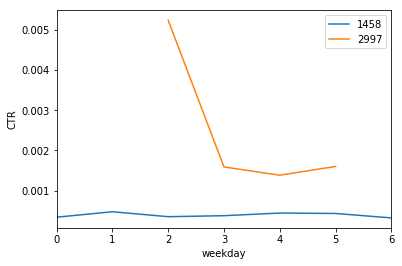

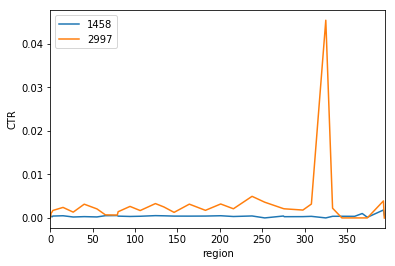

In [13]:
plot_ctr(1458,2997,'adexchange')

plot_ctr(1458,2997,'os')

plot_ctr(1458,2997,'browser')

plot_ctr(1458,2997,'hour')

plot_ctr(1458,2997,'weekday')

plot_ctr(1458,2997,'region')

In [14]:
def plot_payprice(advertiser1,advertiser2,category):
 
    df_clicked1 = ori_train.loc[(ori_train['advertiser']==advertiser1)]
    
    cost_weekday1 = df_clicked1['payprice'].groupby(ori_train[category])

    dfeCPC1 = pd.DataFrame(cost_weekday1.mean()).rename(columns={'payprice':advertiser1})
    
    df_clicked2 = ori_train.loc[(ori_train['advertiser']==advertiser2)]

    cost_weekday2 = df_clicked2['payprice'].groupby(ori_train[category])

    dfeCPC2 = pd.DataFrame(cost_weekday2.mean()).rename(columns={'payprice':advertiser2})
    
    plt.figure
    pd.concat([dfeCPC1,dfeCPC2],axis=1).plot()
    plt.ylabel('Price')

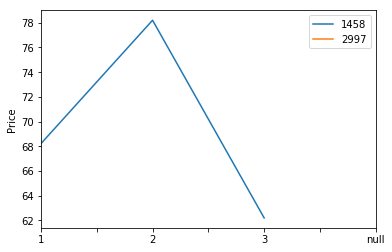

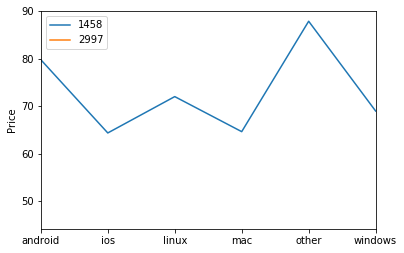

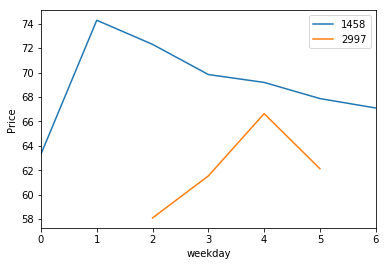

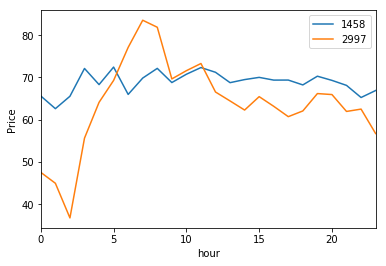

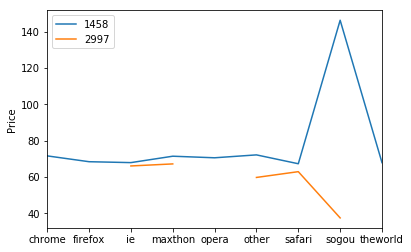

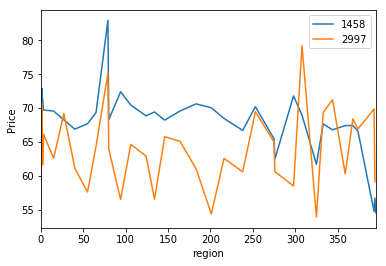

In [15]:
plot_payprice(1458,2997,'adexchange')

plot_payprice(1458,2997,'os')

plot_payprice(1458,2997,'weekday')

plot_payprice(1458,2997,'hour')

plot_payprice(1458,2997,'browser')

plot_payprice(1458,2997,'region')

In [16]:
def calc_eCPC(advertiser,category):
    df_clicked = ori_train.loc[(ori_train['click']==1)]

    cost_weekday = ori_train['payprice'].groupby(ori_train[category])
    click_weekday = df_clicked['click'].groupby(ori_train[category])

    dfeCPC = pd.DataFrame((cost_weekday.sum()/click_weekday.sum())/1000).rename(columns={0:'eCPC'})
    
    plt.figure
    dfeCPC.plot.bar(legend=False)
    plt.ylabel('eCPC')

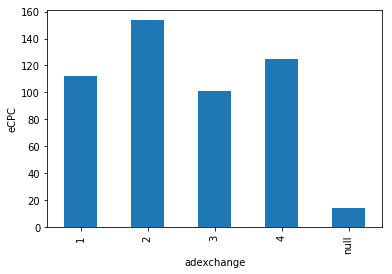

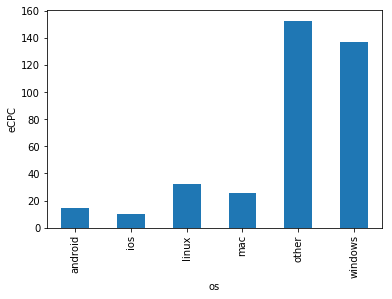

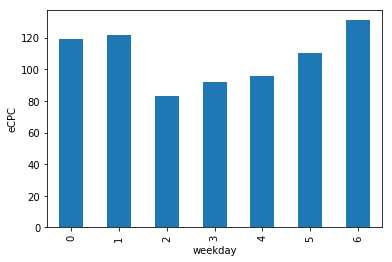

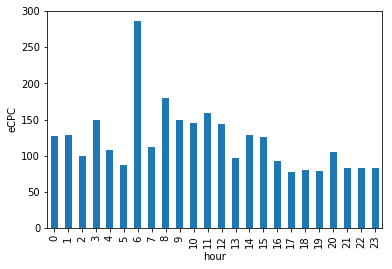

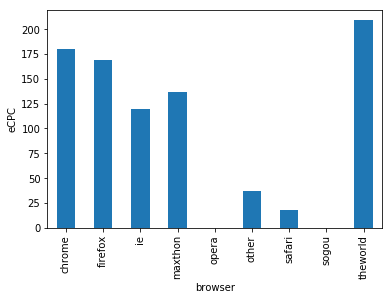

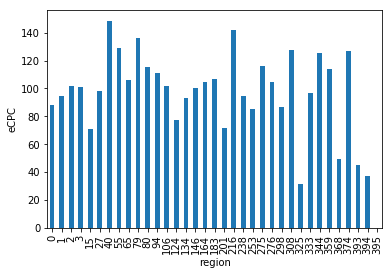

In [17]:
pic2 = calc_eCPC(3358,'adexchange')
calc_eCPC(3358,'os')

calc_eCPC(3358,'weekday')

calc_eCPC(3358,'hour')

calc_eCPC(3358,'browser')

calc_eCPC(3358,'region')

## logistic ## 

In [18]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
y_train = ori_train['click'].values
y_val = ori_val['click'].values
lr_instance = lr()
lr_instance.fit(x_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
log_val = lr_instance.predict_proba(x_val)

In [20]:
trainv = pd.DataFrame(log_val)
trainv 

,0,1
0,0.979411,0.020589
1,0.999900,0.000100
2,0.999863,0.000137
3,0.999863,0.000137
4,0.999900,0.000100
5,0.999886,0.000114
6,0.999863,0.000137
7,0.999886,0.000114
8,0.999900,0.000100
9,0.999863,0.000137


In [21]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = ori_val['click'].values
y_pre = trainv[1]
auc_val_log = roc_auc_score(y_true, y_pre)
auc_val_log

0.53745293188755272

In [22]:
avgCTR= ori_train['click'].mean()
bidbase = 97
trainv['pre_click'] = trainv[1]
trainv['unitprice'] = trainv['pre_click'] /avgCTR
trainv['bidprice'] =trainv['pre_click'] /avgCTR * bidbase
trainv['payprice'] = ori_val['payprice']
trainv['click'] = ori_val['click']
trainv['advertiser'] = ori_val['advertiser']
buyyed = trainv[trainv['bidprice']>= trainv['payprice']]
# trainv['click'].count()
trainv.head(5)

,0,1,pre_click,unitprice,bidprice,payprice,click,advertiser
0,0.979411,0.020589,0.020589,27.915185,2707.772911,23,0,1458
1,0.999900,0.000100,0.000100,0.135916,13.183806,75,0,3476
2,0.999863,0.000137,0.000137,0.185782,18.020819,65,0,3358
3,0.999863,0.000137,0.000137,0.185782,18.020808,6,0,3358
4,0.999900,0.000100,0.000100,0.135915,13.183792,5,0,3476


In [23]:
buyyed.head(5)

,0,1,pre_click,unitprice,bidprice,payprice,click,advertiser
0,0.979411,0.020589,0.020589,27.915185,2707.772911,23,0,1458
3,0.999863,0.000137,0.000137,0.185782,18.020808,6,0,3358
4,0.999900,0.000100,0.000100,0.135915,13.183792,5,0,3476
13,0.979411,0.020589,0.020589,27.914639,2707.720006,110,0,1458
15,0.979411,0.020589,0.020589,27.914583,2707.714596,16,0,1458


In [24]:
def evaluate(data):
    buyyed = data[data['bidprice']>= data['payprice']]
    ctr,clicks,cost = buyyed['click'].mean(),buyyed['click'].sum(),buyyed['payprice'].sum()
    CPC = cost/clicks/1000
    CPM = cost /buyyed['click'].count() *1000
    return ctr,clicks,cost,CPC,CPM 
eval_val = evaluate(trainv)
eval_val

(0.000574566962399662, 68, 7374141, 108.44325, 62307.90874524715)

## xgboost1 with tag  ##

In [25]:
import xgboost as xgb
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier


/Users/fanwen/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/fanwen/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
y_train = ori_train['click'].values
y_val = ori_val['click'].values

In [ ]:
xgb_model = xgb.XGBClassifier()
parameters = {'nthread':[1] 
              'objective':['binary:logistic'],
              'learning_rate':[0.1],
              'max_depth':[10,11,12],
              'min_child_weight':[11],
              'silent':[1],
              'subsample':[0.7],
              'colsample_bytree':[1],
              'n_estimators':[50,70,100],
              'missing':[-999],
              'seed':[1337]
             }

In [ ]:
# model_1 = GridSearchCV(xgb_model, param_grid=parameters, n_jobs=5,
#                        cv=StratifiedKFold(y_train, n_folds=5,shuffle=True),
#                        scoring='roc_auc',
#                        verbose=2,
#                        refit=True)
# model_1.fit(x_train, y_train)

In [ ]:
from sklearn.externals import joblib
# Save
joblib.dump(model_1, 'xg1.pkl')
# restore
model_1 = joblib.load('xg1.pkl')
print(model_1.predict(x_val[0:4]))

In [ ]:
best_parameters, score, _ = max(model_1.grid_scores_, key=lambda x:x[1])
print('Raw Auc score', score)

for param_name in sorted(best_parameters.keys()):
    print("%s: %r"%(param_name, best_parameters[param_name]))